In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

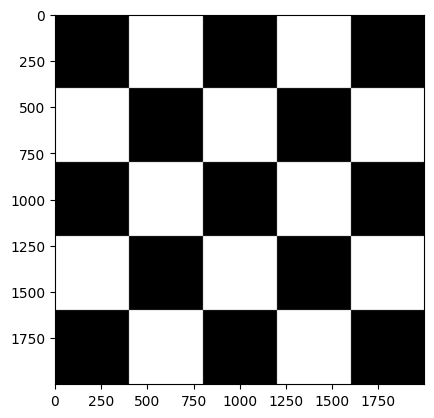

In [2]:
checkerboard = cv2.imread(r"../source/checker_board_small.png")
checkerboard = cv2.cvtColor(checkerboard, cv2.COLOR_BGR2RGB)
plt.imshow(checkerboard)

In [3]:
def compute_derivatives(img):
    # Using sobel filter

    Ix = cv2.Sobel(img, cv2.CV_64F, 1, 0, ksize= 1)
    Iy = cv2.Sobel(img, cv2.CV_64F, 0, 1, ksize= 1)
    return Ix, Iy
Ix, Iy = compute_derivatives(checkerboard)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-255.0..255.0].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-255.0..255.0].


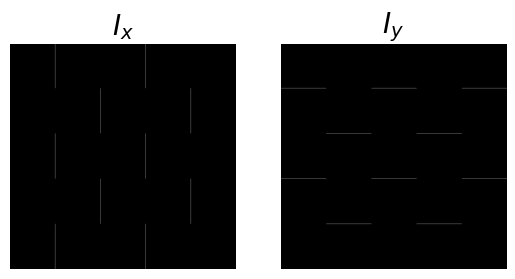

In [4]:
fig, ax = plt.subplots(1, 2)

ax[0].set_title('$I_x$', fontsize = 20)
ax[0].set_axis_off()
ax[1].set_axis_off()
ax[0].imshow(Ix, cmap="gray")
ax[1].set_title('$I_y$', fontsize = 20)
ax[1].imshow(Iy, cmap="gray")

In [5]:
def harris(Ix, Iy, window_size):
 
  output = np.zeros_like(Ix)

  pd = (window_size)//2

  idx_x = np.arange(pd, Ix.shape[1]-pd, 1)
  idx_y = np.arange(pd, Ix.shape[0]-pd, 1)

  for i in idx_x.astype(int):
    for j in idx_y.astype(int):
      structure_tensor = np.zeros((2,2))

      Ix_roi = Ix[i-pd:i+pd,j-pd:j+pd]
      Iy_roi = Iy[i-pd:i+pd,j-pd:j+pd]

      Ix_sq = np.sum(np.square(Ix_roi))
      Iy_sq = np.sum(np.square(Iy_roi))
      Ixy = np.sum(Ix_roi*Iy_roi)

      structure_tensor[0,0] = Ix_sq
      structure_tensor[0,1] = Ixy
      structure_tensor[1,0] = Ixy
      structure_tensor[1,1] = Iy_sq

      eigenvalues, eigenvectors = np.linalg.eig(structure_tensor)
      index = np.argsort(eigenvalues)
      smaller_eigenvalue = eigenvalues[index[0]]

      output[i,j] = smaller_eigenvalue
  # ===============================================

  return output

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..780300.0].


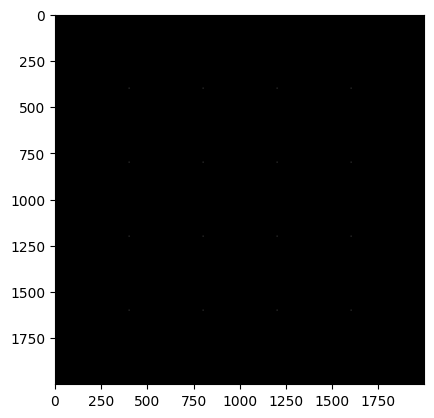

In [6]:
corners = harris(Ix, Iy, 3)
plt.imshow(corners, cmap = "gray")
plt.show()

In [7]:
def corner_detections(harris_matrix,radius, thresh):
  rows, cols = harris_matrix.shape
  window_size = radius*2 + 1
  kernel = np.ones((window_size, window_size))

  iterations = window_size**2
  dilated = cv2.dilate(harris_matrix,kernel, iterations)
  bordermask = np.zeros_like(harris_matrix)
  bordermask[radius:-radius, radius:-radius] = 1
  maxima = np.logical_and(np.logical_and(harris_matrix == dilated, harris_matrix > thresh), bordermask)
  detections = np.where(maxima)

  return detections


def draw_detections(img, detections, cross_halfsize = 3):

  image = img.copy()
  rows, cols = detections


  for row, col in zip(rows, cols):
    start_point = (row - cross_halfsize, col)
    end_point = (row + cross_halfsize, col)
    color = (1, 0, 0)
    thickness = 1
    img = cv2.line(image, start_point, end_point, color, thickness)
    start_point = (row, col - cross_halfsize)
    end_point = (row, col + cross_halfsize)
    img = cv2.line(image, start_point, end_point, color, thickness)


  plt.imshow(img)



In [8]:
detections = corner_detections(corners,1, 0.2)
draw_detections(checkerboard, detections)

ValueError: too many values to unpack (expected 2)